In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/BU Athletics Data 22-23.csv')

In [3]:
df.head()

,Data Input Year,Student,State,US Region,Country,English Language Primary Language of Country,IPEDS Race Description,Athletic Code 1,Team Gender,Athletic Code Description 1,...,Semester GPI-13th Sem,Semester GPI-14th Sem,Semester GPI-15th Sem,Semester GPI-16th Sem,Semester GPI-17th Sem,Semester GPI-18th Sem,Semester GPI-19th Sem,Semester GPI-20th Sem,Semester GPI-21st Sem,Semester GPI-22nd Sem
0,2022,1,NaN,NaN,Canada,English,Non-Resident Alien,HC,M,MEN'S ICE HOCKEY,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,2,CT,NaN,NaN,NaN,African American or Black,SC,M,MEN'S SOCCER,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023,3,CA,NaN,NaN,NaN,White,MC,M,MEN'S ROWING,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,14,NaN,NaN,Italy,Non-English,Non-Resident Alien,SC,M,MEN'S SOCCER,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023,15,NaN,NaN,Germany,Non-English,Non-Resident Alien,MC,M,MEN'S ROWING,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df = df[['Country', 'English Language Primary Language of Country', 'IPEDS Race Description', 'Cumulative GPA-22nd Sem']]


In [5]:
df.rename(columns  = {'English Language Primary Language of Country':'language', 'race':'IPEDS Race Description', 'Cumulative GPA-22nd Sem':'cgpa'}, inplace  =True)

### DOMESTIC vs INTERNATIONAL

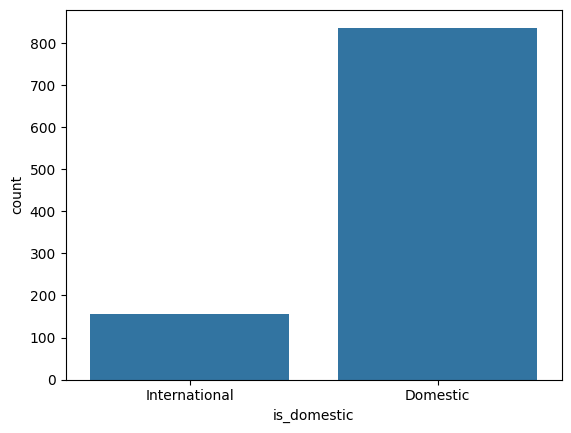

In [6]:
df['is_domestic'] = df['Country'].isna()
df['is_domestic'] = df['is_domestic'].map({True: 'Domestic', False: 'International'})

# Create a count plot
sns.countplot(x='is_domestic', data=df)

# plt.savefig('domestic_vs_international_counts.png')

plt.show()

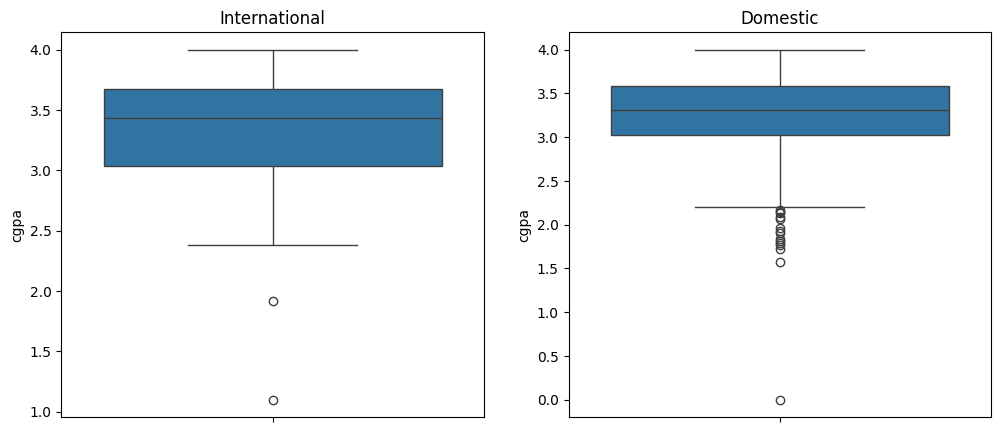

In [7]:
plt.figure(figsize=(12, 5))


# Distribution of SATCFORAI 
plt.subplot(1, 2, 1)
sns.boxplot(df[df['is_domestic'] == 'International']['cgpa'])
plt.title('International')

# Distribution of HSGPA 
plt.subplot(1, 2, 2)
sns.boxplot(df[df['is_domestic'] == 'Domestic']['cgpa'])
plt.title('Domestic')

# plt.savefig('domestic_vs_international_gpa_dist.png')


plt.show()

Median is almost same for both, suggesting on an average performance of international and domestic students are almost similiar. But lot of outliers in Domestic. Some atheltes even got less than 2 cgpa. So grades for domestic students are little less consistent. Also, values between median and upperquartile range are better for International students, may suggest that they have the more highest grades.

Also since the data is imbalanced, so we cannot come to conlusion on above insights.

## ENGLISH vs NON ENGLISH INTERNATIONAL STUDENTS

<Axes: xlabel='count', ylabel='language'>

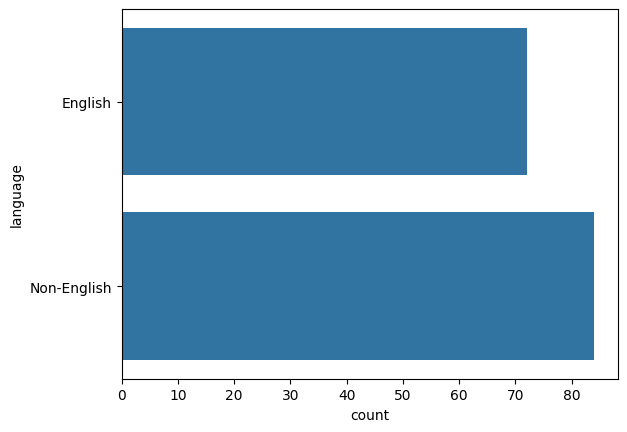

In [8]:
sns.countplot(df['language'])

# plt.savefig('international_english_vs_nonenglish_counts.png')

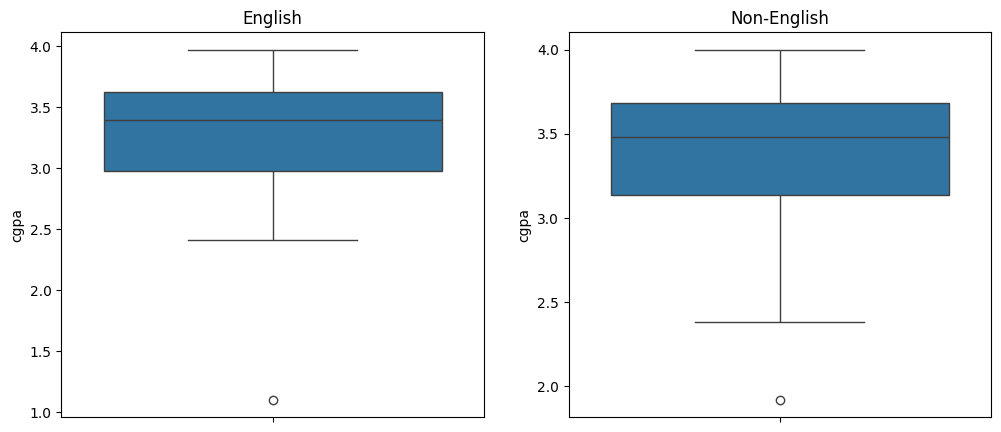

In [9]:
in_df = df.dropna(subset = ['language'])

plt.figure(figsize=(12, 5))


# Distribution of SATCFORAI 
plt.subplot(1, 2, 1)
sns.boxplot(in_df[in_df['language'] == 'English']['cgpa'])
plt.title('English')

# Distribution of HSGPA 
plt.subplot(1, 2, 2)
sns.boxplot(in_df[in_df['language'] != 'English']['cgpa'])
plt.title('Non-English')

# plt.savefig('international_english_vs_nonenglish_gpa_dist.png')


plt.show()

If you ignore the outliers, the distribution is pretty much the same, suggesting us that English as primary lanuage or not, is not making any necessary for athletes grades, infact the lower quartile range is slightly better for Non-English students

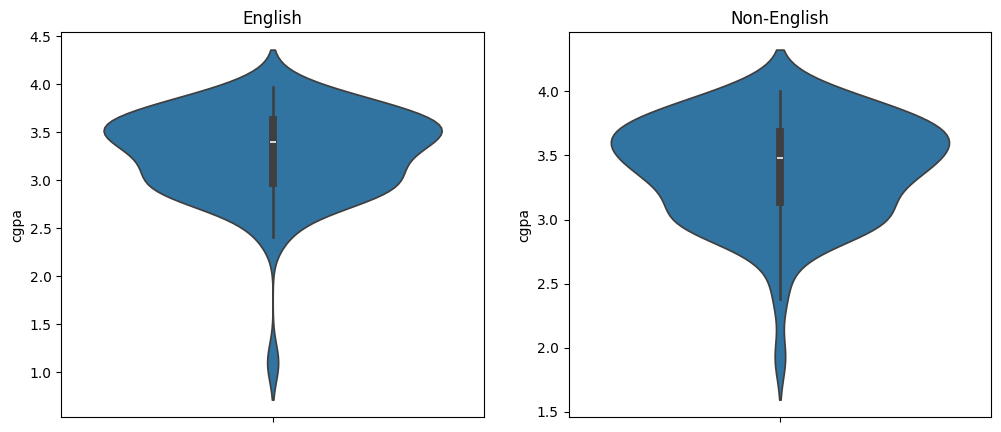

In [12]:
in_df = df.dropna(subset = ['language'])

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
sns.violinplot(in_df[in_df['language'] == 'English']['cgpa'])
plt.title('English')

plt.subplot(1, 2, 2)
sns.violinplot(in_df[in_df['language'] != 'English']['cgpa'])
plt.title('Non-English')

plt.savefig('international_english_vs_nonenglish_gpa_dist_violins.png')


plt.show()